<a href="https://www.kaggle.com/code/mohdmuttalib/eda-g2net-detecting-continuous-gravitational-waves?scriptVersionId=109498878" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import h5py
import matplotlib.pyplot as plt
import tqdm
import pickle

# Check the contents of a HDF file

In [2]:
with h5py.File('../input/g2net-detecting-continuous-gravitational-waves/train/001121a05.hdf5','r') as f:
    for k1 in f:
        print("0:",k1)
        for k2 in f[k1]:
            print("1:",f[k1][k2])
            for k3 in f[k1][k2]:
                try:
                    print("2:",f[k1][k2][k3])
                except TypeError:
                    pass

0: 001121a05
1: <HDF5 group "/001121a05/H1" (2 members)>
2: <HDF5 dataset "SFTs": shape (360, 4612), type "<c8">
2: <HDF5 dataset "timestamps_GPS": shape (4612,), type "<i8">
1: <HDF5 group "/001121a05/L1" (2 members)>
2: <HDF5 dataset "SFTs": shape (360, 4653), type "<c8">
2: <HDF5 dataset "timestamps_GPS": shape (4653,), type "<i8">
1: <HDF5 dataset "frequency_Hz": shape (360,), type "<f8">


# Extract abstract of train/test data
I extract
1. min/max frequency
2. H1/L1 SFTs sizes 
3. H1/L1 SFTs timestamps_GPS min/max
4. H1/L1 SFTs timestamps_GPS maximum interval 


In [3]:
df_train = pd.DataFrame(columns = ['freq min','freq max','H1 SFTs h','H1 SFTs w','H1 time min','H1 time max','H1 max inteval','L1 SFTs h','L1 SFTs w','L1 time min','L1 time max','L1 max inteval'])
df_test =  pd.DataFrame(columns = ['freq min','freq max','H1 SFTs h','H1 SFTs w','H1 time min','H1 time max','H1 max inteval','L1 SFTs h','L1 SFTs w','L1 time min','L1 time max','L1 max inteval'])


# For train data

In [4]:
dirname = '/kaggle/input/g2net-detecting-continuous-gravitational-waves/train/'
trainfiles = sorted(os.listdir(dirname))
filenames = trainfiles # + testfiles
timestamps_train_H1 = []
timestamps_train_L1 = []
print(f"train files = {len(trainfiles)}")
for filename in tqdm.tqdm(filenames):
    filepath = os.path.join(dirname, filename)
    file_id = filename.split('.')[0]
    f = h5py.File(filepath,'r')
    H1tinterval = np.array(f[file_id]['H1']["timestamps_GPS"])
    timestamps_train_H1.append(H1tinterval) # save timestamps (not interval)
    H1tinterval = H1tinterval[1:]-H1tinterval[0:-1]
    L1tinterval = np.array(f[file_id]['L1']["timestamps_GPS"])
    timestamps_train_L1.append(L1tinterval) # save timestamps (not interval)
    L1tinterval = L1tinterval[1:]-L1tinterval[0:-1]
    df_train.loc[file_id] =  [min(f[file_id]['frequency_Hz']),max(f[file_id]['frequency_Hz']),
                    f[file_id]['H1']["SFTs"].shape[0],f[file_id]['H1']["SFTs"].shape[1],
                              min(f[file_id]['H1']["timestamps_GPS"]),max(f[file_id]['H1']["timestamps_GPS"]),max(H1tinterval),
                    f[file_id]['L1']["SFTs"].shape[0],f[file_id]['L1']["SFTs"].shape[1],
                              min(f[file_id]['L1']["timestamps_GPS"]),max(f[file_id]['L1']["timestamps_GPS"]),max(H1tinterval)]
    f.close()
df_train.to_csv('train_summary.csv')
with open("timestamps_train_H1.pickle", 'wb') as f: pickle.dump(timestamps_train_H1, f)
with open("timestamps_train_L1.pickle", 'wb') as f: pickle.dump(timestamps_train_L1, f)

train files = 603


100%|██████████| 603/603 [00:57<00:00, 10.45it/s]


# For test data

In [5]:
dirname = '/kaggle/input/g2net-detecting-continuous-gravitational-waves/test/'
testfiles = sorted(os.listdir(dirname))
filenames = testfiles 
timestamps_test_H1 = []
timestamps_test_L1 = []
print(f"test files = {len(testfiles)}")
for filename in tqdm.tqdm(filenames):
    filepath = os.path.join(dirname, filename)
    file_id = filename.split('.')[0]
    f = h5py.File(filepath,'r')
    H1tinterval = np.array(f[file_id]['H1']["timestamps_GPS"])
    timestamps_test_H1.append(H1tinterval) # save timestamps (not interval)
    H1tinterval = H1tinterval[1:]-H1tinterval[0:-1]
    L1tinterval = np.array(f[file_id]['L1']["timestamps_GPS"])
    timestamps_test_L1.append(L1tinterval) # save timestamps (not interval)
    L1tinterval = L1tinterval[1:]-L1tinterval[0:-1]
    df_test.loc[file_id] =  [min(f[file_id]['frequency_Hz']),max(f[file_id]['frequency_Hz']),
                    f[file_id]['H1']["SFTs"].shape[0],f[file_id]['H1']["SFTs"].shape[1],
                              min(f[file_id]['H1']["timestamps_GPS"]),max(f[file_id]['H1']["timestamps_GPS"]),max(H1tinterval),
                    f[file_id]['L1']["SFTs"].shape[0],f[file_id]['L1']["SFTs"].shape[1],
                              min(f[file_id]['L1']["timestamps_GPS"]),max(f[file_id]['L1']["timestamps_GPS"]),max(H1tinterval)]
    f.close()
df_test.to_csv('test_summary.csv')
with open("timestamps_test_H1.pickle", 'wb') as f: pickle.dump(timestamps_test_H1, f)
with open("timestamps_test_L1.pickle", 'wb') as f: pickle.dump(timestamps_test_L1, f)

test files = 7975


100%|██████████| 7975/7975 [13:06<00:00, 10.14it/s]


# Check the extracted data

In [6]:
df_train

,freq min,freq max,H1 SFTs h,H1 SFTs w,H1 time min,H1 time max,H1 max inteval,L1 SFTs h,L1 SFTs w,L1 time min,L1 time max,L1 max inteval
001121a05,53.507778,53.707222,360.0,4612.0,1.238170e+09,1.248556e+09,57519.0,360.0,4653.0,1.238170e+09,1.248585e+09,57519.0
004f23b2d,329.020000,329.219444,360.0,4546.0,1.238172e+09,1.248531e+09,41359.0,360.0,4630.0,1.238167e+09,1.248565e+09,41359.0
00a6db666,213.188333,213.387778,360.0,4525.0,1.238189e+09,1.248559e+09,45639.0,360.0,4598.0,1.238181e+09,1.248553e+09,45639.0
00f36a6ac,453.259444,453.458889,360.0,4609.0,1.238168e+09,1.248672e+09,43418.0,360.0,4566.0,1.238175e+09,1.248587e+09,43418.0
010a387db,231.883889,232.083333,360.0,4624.0,1.238167e+09,1.248561e+09,56772.0,360.0,4527.0,1.238167e+09,1.248602e+09,56772.0
...,...,...,...,...,...,...,...,...,...,...,...,...
fe38dbe64,372.920000,373.119444,360.0,4566.0,1.238168e+09,1.248571e+09,38733.0,360.0,4448.0,1.238173e+09,1.248544e+09,38733.0
feafd0d16,481.220000,481.419444,360.0,4575.0,1.238171e+09,1.248556e+09,43984.0,360.0,4685.0,1.238166e+09,1.248526e+09,43984.0
feeca844e,369.225000,369.424444,360.0,4527.0,1.238171e+09,1.248547e+09,37243.0,360.0,4673.0,1.238174e+09,1.248533e+09,37243.0
ff5ad023f,293.768333,293.967778,360.0,4515.0,1.238169e+09,1.248545e+09,40946.0,360.0,4592.0,1.238178e+09,1.248557e+09,40946.0


In [7]:
df_test

,freq min,freq max,H1 SFTs h,H1 SFTs w,H1 time min,H1 time max,H1 max inteval,L1 SFTs h,L1 SFTs w,L1 time min,L1 time max,L1 max inteval
00054c878,306.402222,306.601667,360.0,4639.0,1.238170e+09,1.248567e+09,43102.0,360.0,4566.0,1.238169e+09,1.248561e+09,43102.0
0007285a3,126.348889,126.548333,360.0,4427.0,1.238168e+09,1.248520e+09,42746.0,360.0,4650.0,1.238170e+09,1.248537e+09,42746.0
00076c5a6,197.289444,197.488889,360.0,4599.0,1.238169e+09,1.248535e+09,55878.0,360.0,4633.0,1.238172e+09,1.248567e+09,55878.0
001349290,94.908333,95.107778,360.0,4609.0,1.238171e+09,1.248536e+09,48020.0,360.0,4621.0,1.238167e+09,1.248537e+09,48020.0
001a52e92,464.077222,464.276667,360.0,4601.0,1.238167e+09,1.248535e+09,45246.0,360.0,4366.0,1.238167e+09,1.248543e+09,45246.0
...,...,...,...,...,...,...,...,...,...,...,...,...
ffbce04ef,413.908333,414.107778,360.0,4533.0,1.238175e+09,1.248548e+09,53356.0,360.0,4634.0,1.238174e+09,1.248589e+09,53356.0
ffc2d976b,495.635000,495.834444,360.0,4611.0,1.238179e+09,1.248542e+09,37365.0,360.0,4730.0,1.238173e+09,1.248539e+09,37365.0
ffc905909,417.041667,417.241111,360.0,4726.0,1.238198e+09,1.248582e+09,51571.0,360.0,4619.0,1.238171e+09,1.248563e+09,51571.0
ffe276f3e,128.455000,128.654444,360.0,4520.0,1.238168e+09,1.248535e+09,48329.0,360.0,4533.0,1.238167e+09,1.248535e+09,48329.0


SFTs h(frequency) size seems to be all 360, so check it.

In [8]:
print(df_train['H1 SFTs h'].unique())
print(df_train['L1 SFTs h'].unique())
print(df_test['H1 SFTs h'].unique())
print(df_test['L1 SFTs h'].unique())


[360.]
[360.]
[360.]
[360.]


# Distribution of SFTs w(time) size

SFTs w(time) sizes are different from file to file. So, check the distribution.

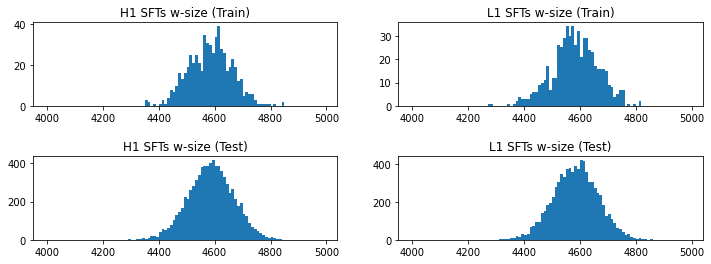

In [9]:
fig,ax = plt.subplots(2,2,figsize=(12,4))
plt.subplots_adjust(hspace=0.6)
_ = ax[0,0].hist(df_train['H1 SFTs w'],range(4000,5000,10))
_ = ax[0,0].set_title('H1 SFTs w-size (Train)')
_ = ax[0,1].hist(df_train['L1 SFTs w'],range(4000,5000,10))
_ = ax[0,1].set_title('L1 SFTs w-size (Train)')
_ = ax[1,0].hist(df_test['H1 SFTs w'],range(4000,5000,10))
_ = ax[1,0].set_title('H1 SFTs w-size (Test)')
_ = ax[1,1].hist(df_test['L1 SFTs w'],range(4000,5000,10))
_ = ax[1,1].set_title('L1 SFTs w-size (Test)')



# Distribution of SFTs min/max frequency

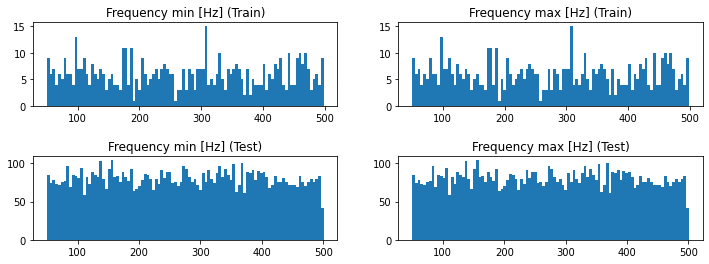

In [10]:
fig,ax = plt.subplots(2,2,figsize=(12,4))
plt.subplots_adjust(hspace=0.6)
_ = ax[0,0].hist(df_train['freq min'] ,100)
_ = ax[0,0].set_title('Frequency min [Hz] (Train)')
_ = ax[0,1].hist(df_train['freq max'] ,100)
_ = ax[0,1].set_title('Frequency max [Hz] (Train)')
#_ = ax[0,2].hist(df_train['freq max']-df_train['freq min']  ,100)
#_ = ax[0,2].set_title('Frequency span [Hz] (Train)')

_ = ax[1,0].hist(df_test['freq min'] ,100)
_ = ax[1,0].set_title('Frequency min [Hz] (Test)')
_ = ax[1,1].hist(df_test['freq max'] ,100)
_ = ax[1,1].set_title('Frequency max [Hz] (Test)')
#_ = ax[1,2].hist(df_test['freq max']-df_test['freq min']  ,100)
#_ = ax[1,2].set_title('Frequency span [Hz] (Test)')


# Target's frequency dependency

Now that I found that frequency window is different from data to data, I should see them grouped by with/without GW(gravitational wave).

In [11]:
df_label = pd.read_csv('../input/g2net-detecting-continuous-gravitational-waves/train_labels.csv')
(df_label.id != df_train.index).sum()


0

Be careful. There are -1 in labels as written in the Dataset Description, which means 'currently unable to determine the status'.

In [12]:
df_label.groupby('target').count()

,id
target,
-1,3
0,200
1,400


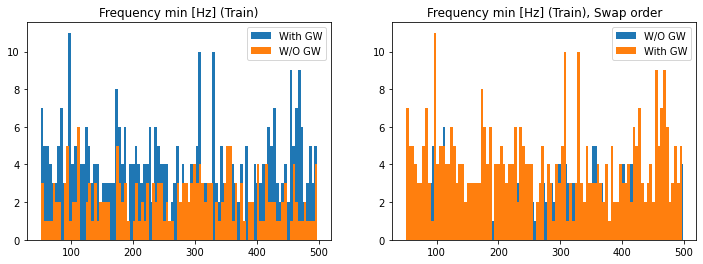

In [13]:
fig , ax = plt.subplots(1,2,figsize=(12,4))
_ = ax[0].hist(df_train.iloc[df_label.target.values==1]['freq min'],100,label='With GW')
_ = ax[0].hist(df_train.iloc[df_label.target.values==0]['freq min'],100,label='W/O GW')
_ = ax[0].legend()
_ = ax[0].set_title('Frequency min [Hz] (Train)')
_ = ax[1].hist(df_train.iloc[df_label.target.values==0]['freq min'],100,label='W/O GW')
_ = ax[1].hist(df_train.iloc[df_label.target.values==1]['freq min'],100,label='With GW')
_ = ax[1].legend()
_ = ax[1].set_title('Frequency min [Hz] (Train), Swap order')


We have to notice, there are only 'with GW' data or 'without GW' data for some frequencies. (Again, frequency windows are just 0.2 Hz)
Let's magnify some frequency.

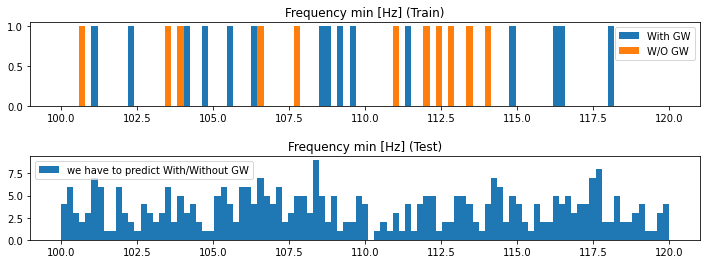

In [14]:
fig , ax = plt.subplots(2,1,figsize=(12,4))
plt.subplots_adjust(hspace=0.6)
_ = ax[0].hist(df_train.iloc[df_label.target.values==1]['freq min'],bins = np.linspace(100,120,100),label='With GW')
_ = ax[0].hist(df_train.iloc[df_label.target.values==0]['freq min'],bins = np.linspace(100,120,100),label='W/O GW')
_ = ax[0].legend()
_ = ax[0].set_title('Frequency min [Hz] (Train)')
_ = ax[1].hist(df_test['freq min'] ,bins = np.linspace(100,120,100),label='we have to predict With/Without GW')
_ = ax[1].legend()
_ = ax[1].set_title('Frequency min [Hz] (Test)')


With freqency windows being 0.2Hz, SFTs's frequencies do not overwrap. We have to make predictions without corresponding frequency pairs if we use only provided training dataset.

# Distribution of timestamps_GPS range
Also check the spans of timestamps_GPS. These are narrower than SFTs w-size.

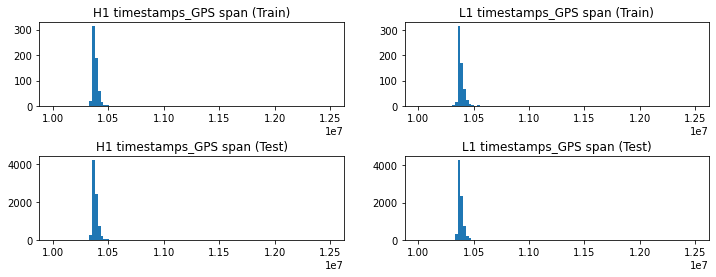

In [15]:
fig,ax = plt.subplots(2,2,figsize=(12,4))
plt.subplots_adjust(hspace=0.6)
_ = ax[0,0].hist(df_train['H1 time max'] - df_train['H1 time min'],bins = np.linspace(10e6,12.5e6,100))
_ = ax[0,0].set_title('H1 timestamps_GPS span (Train)')
_ = ax[0,1].hist(df_train['L1 time max'] - df_train['L1 time min'],bins = np.linspace(10e6,12.5e6,100))
_ = ax[0,1].set_title('L1 timestamps_GPS span (Train)')
_ = ax[1,0].hist(df_test['H1 time max'] - df_test['H1 time min'],bins = np.linspace(10e6,12.5e6,100))
_ = ax[1,0].set_title('H1 timestamps_GPS span (Test)')
_ = ax[1,1].hist(df_test['L1 time max'] - df_test['L1 time min'],bins = np.linspace(10e6,12.5e6,100))
_ = ax[1,1].set_title('L1 timestamps_GPS span (Test)')


# Gaps in timestamps_GPS
There are gaps in timestamps_GPS due to detectors' maintenacne or connection being offline, etc. Let's look at how gaps are.<br>
First, look at SFTs' intervals of three data from train and test data.

/kaggle/input/g2net-detecting-continuous-gravitational-waves/train/


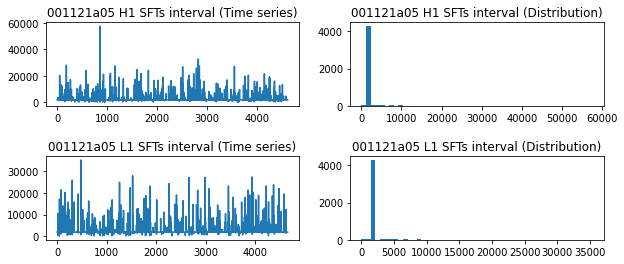

001121a05 H1 first 5 intervals = [1800 1800 1800 1800 1800]  max interval = 57519

001121a05 L1 first 5 intervals = [1800 1800 1800 1800 1800]  max interval = 35340



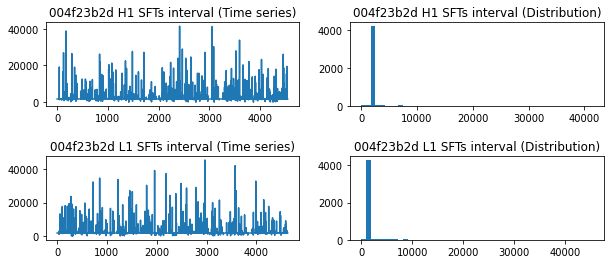

004f23b2d H1 first 5 intervals = [1800 1800 1800 1800 1800]  max interval = 41359

004f23b2d L1 first 5 intervals = [1800 1800 1800 1800 1800]  max interval = 45363



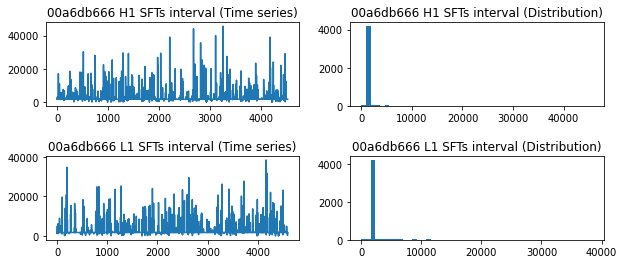

00a6db666 H1 first 5 intervals = [1800 1800 1800 1800 3036]  max interval = 45639

00a6db666 L1 first 5 intervals = [1800 1800 1307 1800 5045]  max interval = 38422

/kaggle/input/g2net-detecting-continuous-gravitational-waves/test/


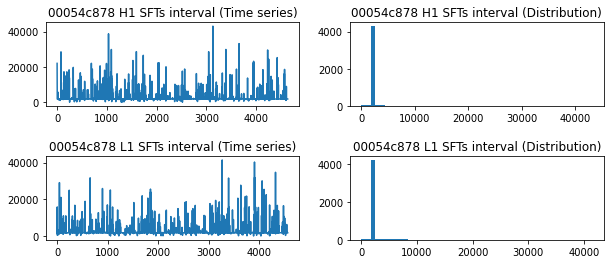

00054c878 H1 first 5 intervals = [22016  2738  1800  1800  1800]  max interval = 43102

00054c878 L1 first 5 intervals = [ 1800  1800  1800 15855  1800]  max interval = 41465



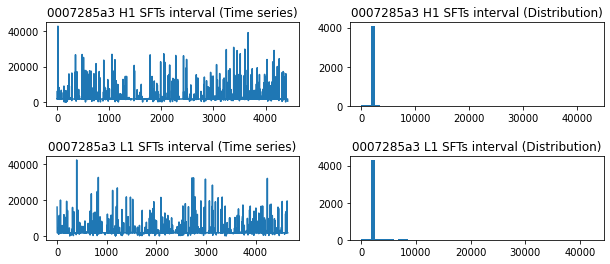

0007285a3 H1 first 5 intervals = [1800 1800 1800 1800 1800]  max interval = 42746

0007285a3 L1 first 5 intervals = [16063  1800  1800  1800  1800]  max interval = 42236



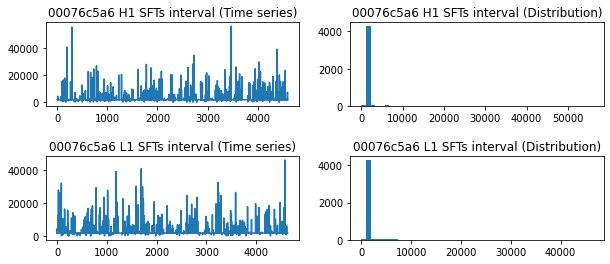

00076c5a6 H1 first 5 intervals = [1800 1800 1800 1800 1800]  max interval = 55878

00076c5a6 L1 first 5 intervals = [1800 1800 4557 1800 1800]  max interval = 46324



In [16]:
for dirname in ['/kaggle/input/g2net-detecting-continuous-gravitational-waves/train/', 
                '/kaggle/input/g2net-detecting-continuous-gravitational-waves/test/']:
    print(dirname)
    trainfiles = sorted(os.listdir(dirname))
    filenames = trainfiles # + testfiles
    for filename in (filenames[:3]):
        filepath = os.path.join(dirname, filename)
        file_id = filename.split('.')[0]
        f = h5py.File(filepath,'r')
        H1tinterval = np.array(f[file_id]['H1']["timestamps_GPS"])
        H1tinterval = H1tinterval[1:]-H1tinterval[0:-1]
        fig,ax = plt.subplots(2,2,figsize=(10,4))
        plt.subplots_adjust(hspace=0.6)
        ax[0,0].plot(H1tinterval)
        ax[0,0].set_title(f"{file_id} H1 SFTs interval (Time series)")
        ax[0,1].hist(H1tinterval,50)
        ax[0,1].set_title(f"{file_id} H1 SFTs interval (Distribution)")

        L1tinterval = np.array(f[file_id]['L1']["timestamps_GPS"])
        L1tinterval = L1tinterval[1:]-L1tinterval[0:-1]
        ax[1,0].plot(L1tinterval)
        ax[1,0].set_title(f"{file_id} L1 SFTs interval (Time series)")
        ax[1,1].hist(L1tinterval,50)
        ax[1,1].set_title(f"{file_id} L1 SFTs interval (Distribution)")
        plt.show()
        print(f"{file_id} H1 first 5 intervals = {H1tinterval[:5]}  max interval = {H1tinterval.max()}\n")
        print(f"{file_id} L1 first 5 intervals = {L1tinterval[:5]}  max interval = {L1tinterval.max()}\n")
        f.close()


Typical intervals are 1800, but all data above have intervals greater than 1800. Having gaps are very common and we have to take this into consideration when we generate training data by ourselves with PyFstat.
Finally, I plot the distribution of maximum intervals for the train and test dataset. Each data usually have gaps 20 to 30 times longer than typical interval, but sometimes have 50 times longer.

# Distribution of maximum gap

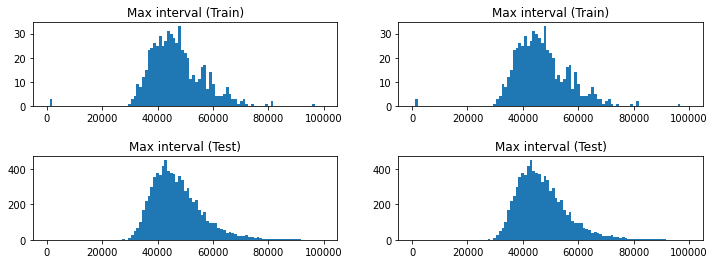

In [17]:
fig,ax = plt.subplots(2,2,figsize=(12,4))
plt.subplots_adjust(hspace=0.6)
_ = ax[0,0].hist(df_train['H1 max inteval'] ,bins=np.linspace(0,100000,100))
_ = ax[0,0].set_title('Max interval (Train)')
_ = ax[0,1].hist(df_train['L1 max inteval'] ,bins=np.linspace(0,100000,100))
_ = ax[0,1].set_title('Max interval (Train)')

_ = ax[1,0].hist(df_test['H1 max inteval'] ,bins=np.linspace(0,100000,100))
_ = ax[1,0].set_title('Max interval (Test)')
_ = ax[1,1].hist(df_test['L1 max inteval'] ,bins=np.linspace(0,100000,100))
_ = ax[1,1].set_title('Max interval (Test)')
